In [33]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/fartuk/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['entropy', 'rayleigh', 'norm', 'uniform', 'poisson', 'wald', 'sample', 'f', 'reciprocal', 'gamma', 'dirichlet', 'randint', 'beta', 'logistic', 'laplace', 'vonmises', 'chisquare', 'bartlett', 'trapz', 'zipf', 'multivariate_normal', 'histogram', 'pareto']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [45]:
# Парамаетры
tetta = 1.0
tetta5 = 10.0
lambda5 = 1.0
alpha = 0.95

# Равномерное

In [185]:
sample = scipy.stats.uniform.rvs(size=100, scale=tetta)

In [186]:
# Оценки по X_
def T1(sample, alpha):
    return (np.mean(sample))/((1.0/2) - (1.0 / np.sqrt(12.0 * alpha * len(sample))))

def T2(sample, alpha):
    return (np.mean(sample))/((1.0/2) + (1.0 / np.sqrt(12.0 * alpha * len(sample))))

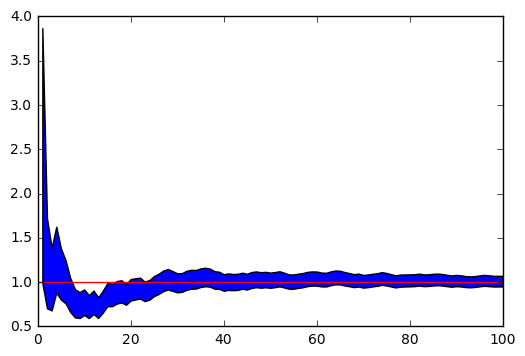

In [187]:
T_1 = []
T_2 = []
for i in range(1, 101):
    T_1 += [T1(sample[:i], alpha)]
    T_2 += [T2(sample[:i], alpha)]
plt.fill_between(range(1, 101), T_1, T_2)
plt.axhline(y=tetta,color='red')

In [188]:
# Оценка вероятности попадания в интервал по первым 10
true_sum = 0
for i in range(10):
    if T_2[i] < tetta < T_1[i]:
        true_sum += 1
print true_sum / 10.0
# Оценка вероятности попадания в интервал по первым 100
true_sum = 0
for i in range(100):
    if T_2[i] < tetta < T_1[i]:
        true_sum += 1
print true_sum / 100.0

0.7
0.9


In [62]:
# Оценки по X(1)
def T1(sample, alpha):
    return min(sample)/(1 - (pow(alpha,1.0/i)))

def T2(sample, alpha):
    return min(sample)

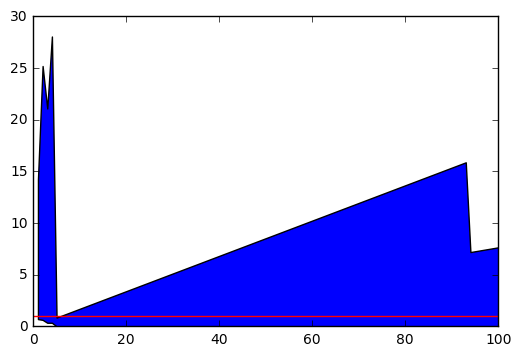

In [63]:
T_1 = []
T_2 = []
for i in range(1, 101):
    T_1 += [T1(sample[:i], alpha)]
    T_2 += [T2(sample[:i], alpha)]
plt.fill_between(range(1, 101), T_1, T_2)
plt.axhline(y=tetta,color='red')

In [64]:
# Оценка вероятности попадания в интервал по первым 10
true_sum = 0
for i in range(10):
    if T_2[i] < tetta < T_1[i]:
        true_sum += 1
print true_sum / 10.0
# Оценка вероятности попадания в интервал по первым 100
true_sum = 0
for i in range(100):
    if T_2[i] < tetta < T_1[i]:
        true_sum += 1
print true_sum / 100.0

0.9
0.99


In [69]:
# Оценки по X(n)
def T1(sample, alpha):
    return max(sample)/(pow(1.0-alpha,1.0/len(sample)))

def T2(sample, alpha):
    return max(sample)

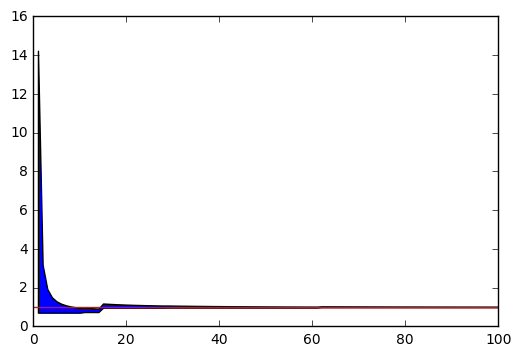

In [70]:
T_1 = []
T_2 = []
for i in range(1, 101):
    T_1 += [T1(sample[:i], alpha)]
    T_2 += [T2(sample[:i], alpha)]
plt.fill_between(range(1, 101), T_1, T_2)
plt.axhline(y=tetta,color='red')

In [71]:
# Оценка вероятности попадания в интервал по первым 10
true_sum = 0
for i in range(10):
    if T_2[i] < tetta < T_1[i]:
        true_sum += 1
print true_sum / 10.0
# Оценка вероятности попадания в интервал по первым 100
true_sum = 0
for i in range(100):
    if T_2[i] < tetta < T_1[i]:
        true_sum += 1
print true_sum / 100.0

0.8
0.94


# Коши

In [80]:
sample = scipy.stats.cauchy.rvs(size=100, loc=theta)

In [85]:
pi = 3.14159268
def T1(sample, alpha):
    return np.median(sample[:i]) + (scipy.stats.norm.ppf((1+alpha)/2.0) * (pi/(2*sqrt(i))))

def T2(sample, alpha):
    return np.median(sample[:i]) - (scipy.stats.norm.ppf((1+alpha)/2.0) * (pi/(2*sqrt(i))))

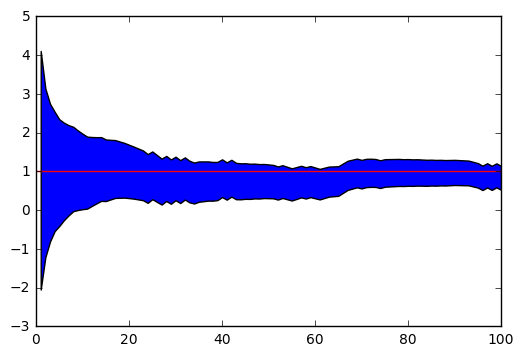

In [86]:
T_1 = []
T_2 = []
for i in range(1, 101):
    T_1 += [T1(sample[:i], alpha)]
    T_2 += [T2(sample[:i], alpha)]
plt.fill_between(range(1, 101), T_1, T_2)
plt.axhline(y=tetta,color='red')

In [87]:
# Оценка вероятности попадания в интервал по первым 10
true_sum = 0
for i in range(10):
    if T_2[i] < tetta < T_1[i]:
        true_sum += 1
print true_sum / 10.0
# Оценка вероятности попадания в интервал по первым 100
true_sum = 0
for i in range(100):
    if T_2[i] < tetta < T_1[i]:
        true_sum += 1
print true_sum / 100.0

1.0
1.0


# Пуассон

In [102]:
sample = scipy.stats.poisson.rvs(size=100, mu=tetta)

In [103]:
pi = 3.14159268
def T1(sample, alpha):
    return np.mean(sample) * (1 + (scipy.stats.norm.ppf((1.0+alpha)/2)/(np.sqrt(len(sample)))))

def T2(sample, alpha):
    return np.mean(sample) * (1 - (scipy.stats.norm.ppf((1.0+alpha)/2)/(np.sqrt(len(sample)))))

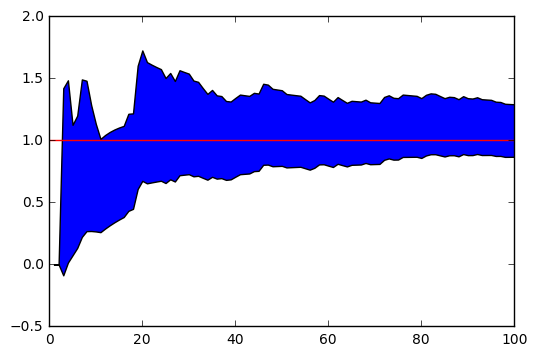

In [104]:
T_1 = []
T_2 = []
for i in range(1, 101):
    T_1 += [T1(sample[:i], alpha)]
    T_2 += [T2(sample[:i], alpha)]
plt.fill_between(range(1, 101), T_1, T_2)
plt.axhline(y=tetta,color='red')

In [105]:
# Оценка вероятности попадания в интервал по первым 10
true_sum = 0
for i in range(10):
    if T_2[i] < tetta < T_1[i]:
        true_sum += 1
print true_sum / 10.0
# Оценка вероятности попадания в интервал по первым 100
true_sum = 0
for i in range(100):
    if T_2[i] < tetta < T_1[i]:
        true_sum += 1
print true_sum / 100.0

0.8
0.98


# Гамма

In [166]:
sample = scipy.stats.gamma.rvs(1, 10, size=100)


In [170]:
def T1(sample, alpha):
    return mean(sample) * (1.0 + (scipy.stats.norm.ppf((1.0+alpha)/2)/sqrt(lambda5*len(sample))))

def T2(sample, alpha):
    return mean(sample) * (1.0 - (scipy.stats.norm.ppf((1.0+alpha)/2)/sqrt(lambda5*len(sample))))


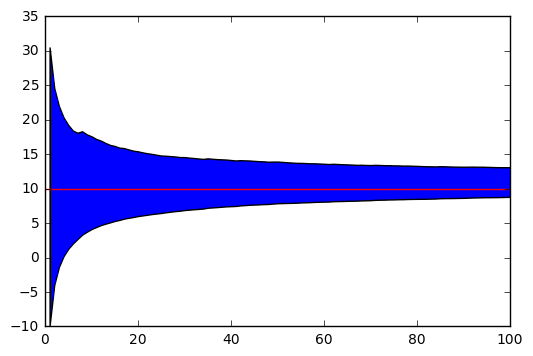

In [171]:
T_1 = []
T_2 = []
for i in range(1, 101):
    T_1 += [T1(sample[:i], alpha)]
    T_2 += [T2(sample[:i], alpha)]
plt.fill_between(range(1, 101), T_1, T_2)
plt.axhline(y=tetta5,color='red')

In [172]:
# Оценка вероятности попадания в интервал по первым 10
true_sum = 0
for i in range(10):
    if T_2[i] < tetta5 < T_1[i]:
        true_sum += 1
print true_sum / 10.0
# Оценка вероятности попадания в интервал по первым 100
true_sum = 0
for i in range(100):
    if T_2[i] < tetta5 < T_1[i]:
        true_sum += 1
print true_sum / 100.0

1.0
1.0
